## TD Estimation bien immobilier

In [1]:
# importation de tous les packages nécessaires à l'exécution du code 

import pandas as pd 
import seaborn as sns
import geopandas
import matplotlib.pyplot as plt
import folium
import branca


In [2]:
# import du dataset

df = pd.read_csv('kc_house_data.csv',index_col='date', parse_dates=True)

### Regarder la structure des données

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21613 entries, 2014-10-13 to 2014-10-15
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  fl

In [4]:
df.shape

(21613, 20)

In [5]:
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
df.drop(['id','waterfront','yr_renovated','zipcode'],axis=1).describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,,
2014-10-13,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2014-12-09,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2015-02-25,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2014-12-09,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2015-02-18,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Repérer les valeurs manquantes

In [8]:
nan_count = df.isna().sum()
print(nan_count.sort_values())

id               0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
grade            0
condition        0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
sqft_living15    0
sqft_lot15       0
dtype: int64


Il n'y a pas de valeur manquante.

## Identifier les doublons

In [9]:
df = df.drop_duplicates()

Il n'y a pas de doublon. Si des ID sont identiques, c'est parce que le bien immobilier a été vendu plusieurs fois entre mai 2014 et mai 2015.

## Modifier les données

In [10]:
# Convertir toutes les colonnes sqft_living en m2
df['sqft_living'] = df['sqft_living'] * 0.092903
df['sqft_lot'] = df['sqft_lot'] * 0.092903
df['sqft_above'] = df['sqft_above'] * 0.092903
df['sqft_basement'] = df['sqft_basement'] * 0.092903
df['sqft_living15'] = df['sqft_living15'] * 0.092903
df['sqft_lot15'] = df['sqft_lot15'] * 0.092903

# Renommer les colonnes qui contiennent les mesures en mètres carrés
df = df.rename(columns={
    'sqft_living': 'm2_living',
    'sqft_lot': 'm2_lot',
    'sqft_above': 'm2_above',
    'sqft_basement': 'm2_basement',
    'sqft_living15': 'm2_living15',
    'sqft_lot15': 'm2_lot15'
})

In [11]:
# Créer une colonne prix au mètre carré
df['price_m2'] = df['price'] / df['m2_living']

In [12]:
#Convertir les zipcode en chaîne de caractères
df['zipcode'] = df['zipcode'].astype(str)

In [13]:
df['id'] = df['id'].astype(str)

## Explorer les données

### Etude des corrélations entre les variables


/tmp/ipykernel_40084/4282930136.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


<Axes: >

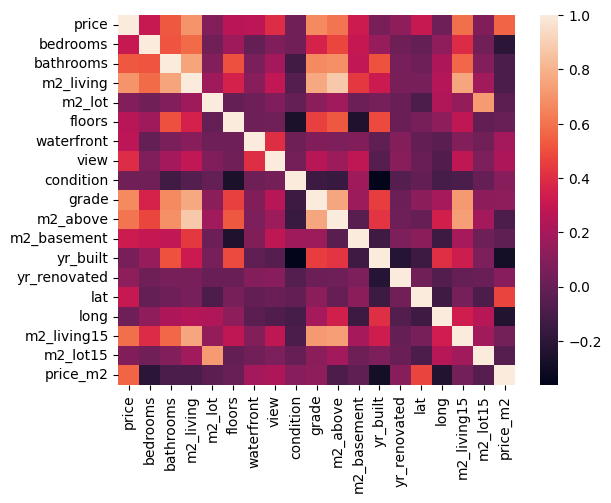

In [14]:
# Corrélation de toutes les variables entre elles
correlations = df.corr()
sns.heatmap(correlations)

/tmp/ipykernel_40084/4001637369.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_price = df.corrwith(df['price']).drop('price').sort_values(ascending=False)


Text(0.5, 1.0, 'Corrélations des différentes variables avec le prix')

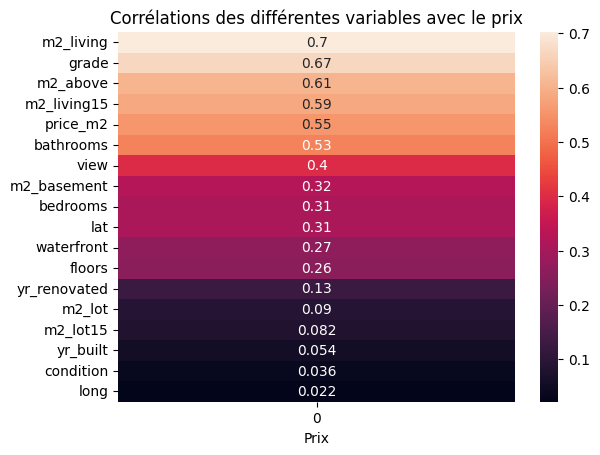

In [15]:
# Corrélation des variables avec le prix
corr_price = df.corrwith(df['price']).drop('price').sort_values(ascending=False)
sns.heatmap(corr_price.to_frame(),annot=True)
plt.xlabel('Prix')
plt.title('Corrélations des différentes variables avec le prix')


Toutes les variables ont une corrélation significative avec le prix à l'exception de : 
- condition 
- long

### Prix

Text(0.5, 1.0, 'Distribution des prix des biens immobiliers')

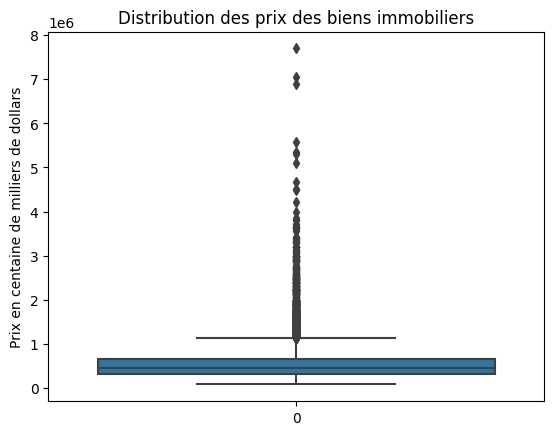

In [16]:
sns.boxplot(df['price'])
plt.xlabel('')
plt.ylabel('Prix en centaine de milliers de dollars')
plt.title('Distribution des prix des biens immobiliers')

Text(0.5, 1.0, 'Distribution des prix des biens immobiliers')

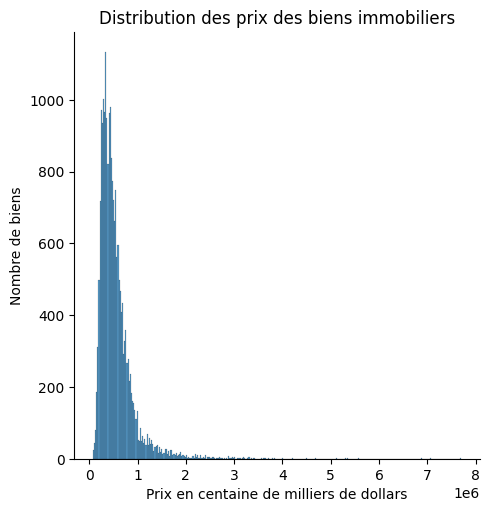

In [17]:
sns.displot(df['price'])
plt.xlabel('Prix en centaine de milliers de dollars')
plt.ylabel('Nombre de biens')
plt.title('Distribution des prix des biens immobiliers')



Les représentations de la distribution des prix des biens immobiliers est asymétriques et montre de nombreuses données extrêmes mais qu'on ne peut pas qualifier d'aberrantes. En conservant ces données, le modèle sera moins précis mais moins restrictif. 
On peut choisir de réaliser deux modèles : 
- un modèle avec toutes les données, moins précis mais moins restrictif
- un modèle sans les données extrêmes, plus précis mais plus restrictif.

On crée le dataframe df_filtre dans lequel on enlève les valeurs extrêmes.

In [18]:
df_filtre = df.loc[df['price'] < df['price'].quantile(0.9)]

Text(0, 0.5, 'Prix en dollars')

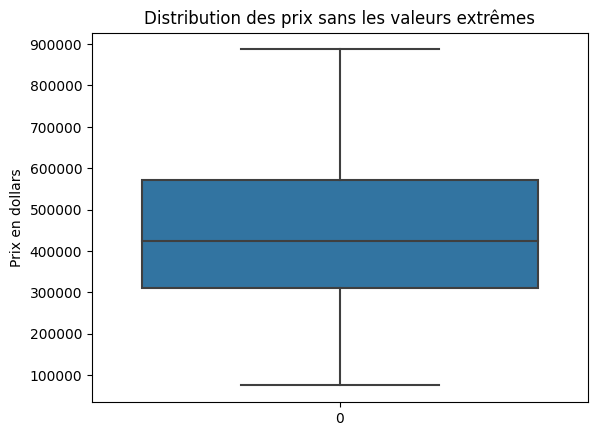

In [19]:
sns.boxplot(df_filtre['price'])
plt.title('Distribution des prix sans les valeurs extrêmes')
plt.ylabel('Prix en dollars')

Text(0.5, 1.0, 'Distribution des prix sans les valeurs extrêmes')

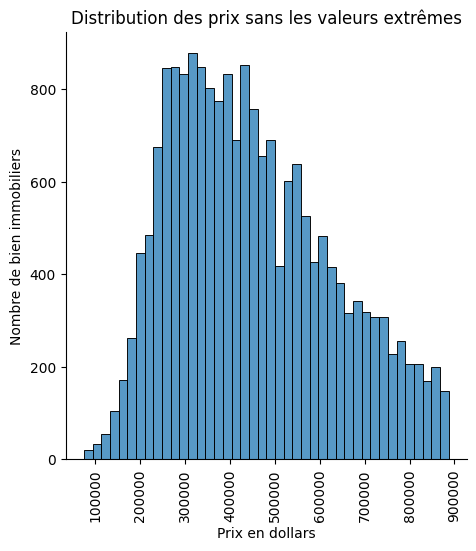

In [20]:
sns.displot(df_filtre['price'])
plt.xticks(rotation=90)
plt.xlabel('Prix en dollars')
plt.ylabel('Nombre de bien immobiliers')
plt.title('Distribution des prix sans les valeurs extrêmes')

### Prix au mètre carré

Text(0.5, 1.0, 'Distributions des biens en fonction du prix au mètre carré')

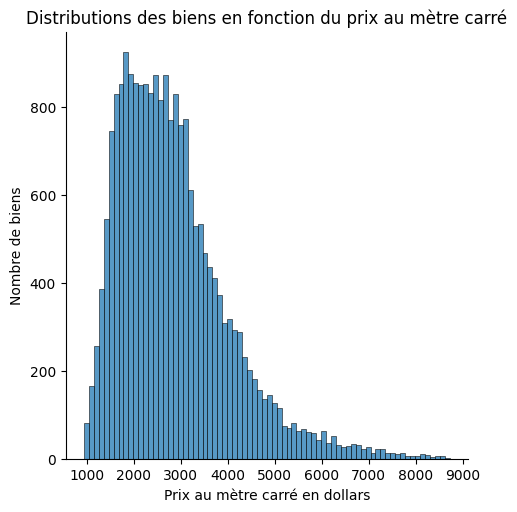

In [21]:
sns.displot(df['price_m2'])
plt.xlabel('Prix au mètre carré en dollars')
plt.ylabel('Nombre de biens')
plt.title('Distributions des biens en fonction du prix au mètre carré')

### Prix au mètre carré en fonction de la localisation

In [22]:
df_gp = df.groupby(by='zipcode').mean()
df_gp = df_gp[['long','lat','price_m2']]
df_gp = pd.DataFrame(df_gp)
df_gp

/tmp/ipykernel_40084/1053305393.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gp = df.groupby(by='zipcode').mean()


,long,lat,price_m2
zipcode,,,
98001,-122.270646,47.309020,1629.526900
98002,-122.213357,47.308780,1627.225073
98003,-122.310054,47.315741,1691.155447
98004,-122.205189,47.616183,5117.548529
98005,-122.167268,47.611532,3389.871491
...,...,...,...
98177,-122.369282,47.742381,3152.952492
98178,-122.246969,47.499118,2036.237025
98188,-122.280993,47.447310,1819.180288


In [23]:
# Créer la carte centrée sur la moyenne des latitudes et longitudes
map = folium.Map(location=[df['lat'].mean(), df['long'].mean()])

# Définir une fonction pour déterminer la couleur en fonction du prix
def get_color(price):
    if price <= 2073:
        return 'green'
    elif price <= 2720:
        return 'pink'
    elif price <= 3382:
        return 'orange'
    else:
        return 'red'

# Ajouter des markers pour chaque maison
for i, row in df_gp.iterrows():
    code_postal = i
    folium.Marker(location=[row['lat'], row['long']], icon=folium.Icon(color=get_color(row['price_m2'])), popup=folium.Popup(str(code_postal))).add_to(map)
    
colormap = branca.colormap.StepColormap(
    colors = ['green','pink','orange','red'],
    vmin=df_gp['price_m2'].min(),
    vmax=4000,
    index=[0,2073,2720,3382],
    caption = 'Prix au mètre carré')

map.add_child(colormap)

# Afficher la carte
map

On peut voir que la localisation des biens semble influencer le prix au mètre carré des biens immobiliers. Il sera donc intéressant de prendre en compte cette variable dans notre modèle. On pourra tester de la considérer avec le zipcode ou avec la longitude et la latitude qui sont plus précises.

### Evolution des prix en fonction de la date

In [24]:
df_gp_date = df.groupby(by='date').mean()
df_gp_date.head()


/tmp/ipykernel_40084/2134139200.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gp_date = df.groupby(by='date').mean()


,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,condition,grade,m2_above,m2_basement,yr_built,yr_renovated,lat,long,m2_living15,m2_lot15,price_m2
date,,,,,,,,,,,,,,,,,,,
2014-05-02,526251.492537,3.402985,2.138060,195.359756,1453.047292,1.462687,0.0,0.223881,3.447761,7.835821,169.069594,26.290162,1972.850746,29.761194,47.570193,-122.183612,192.156683,1465.203718,2763.686341
2014-05-03,466970.000000,3.000000,1.812500,150.502860,826.929603,1.250000,0.0,0.000000,3.500000,7.000000,138.425470,12.077390,1978.750000,0.000000,47.548425,-122.079750,177.444730,2598.264653,3674.925827
2014-05-04,576690.000000,3.200000,2.400000,233.000724,702.625389,1.400000,0.0,0.400000,3.400000,8.400000,174.471834,58.528890,1972.400000,0.000000,47.525660,-122.196200,210.425295,691.086836,2446.949197
2014-05-05,580938.607143,3.523810,2.193452,209.760596,1669.124054,1.565476,0.0,0.202381,3.440476,7.833333,175.364366,34.396230,1972.857143,141.988095,47.593731,-122.205560,189.125070,1251.536129,2956.129714
2014-05-06,534047.903614,3.493976,2.171687,195.297776,1126.696243,1.457831,0.0,0.120482,3.349398,7.650602,164.404731,30.893046,1969.108434,193.373494,47.597886,-122.237205,183.422982,1010.921196,2799.148918


Text(0.5, 1.0, 'Evolution du prix au mètre carré')

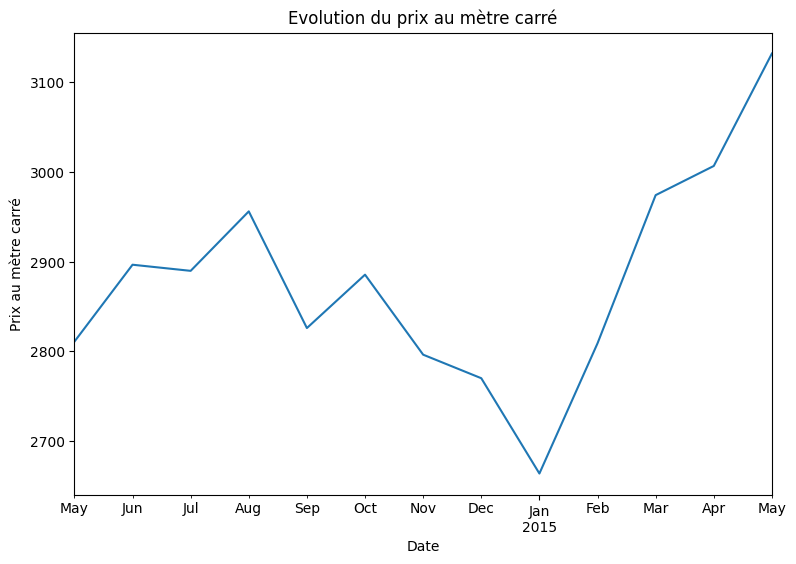

In [25]:
df_gp_date['price_m2'].resample('M').mean().plot(figsize=(9,6))
plt.xlabel('Date')
plt.ylabel('Prix au mètre carré')
plt.title('Evolution du prix au mètre carré')


On remarque des fluctuations dans la courbe de prix en fonction de la date. Cependant, on ne dispose que d'une année et on ne peut pas vérifier s'il existe des redondances en fonction du mois ou de la période de l'année. Nous ne pourrons donc pas utiliser cette variable dans notre modèle.

### Nombre de chambres

In [26]:
corr_bedrooms = df.corrwith(df['price']).bedrooms
corr_bedrooms

/tmp/ipykernel_40084/701857165.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_bedrooms = df.corrwith(df['price']).bedrooms


0.3083574161982014

Il existe une corrélation positive représentative de 0.31 entre le prix d'un bien et le nombre de chambre. 

Text(0.5, 1.0, 'Relation entre le nombre de chambres et le prix')

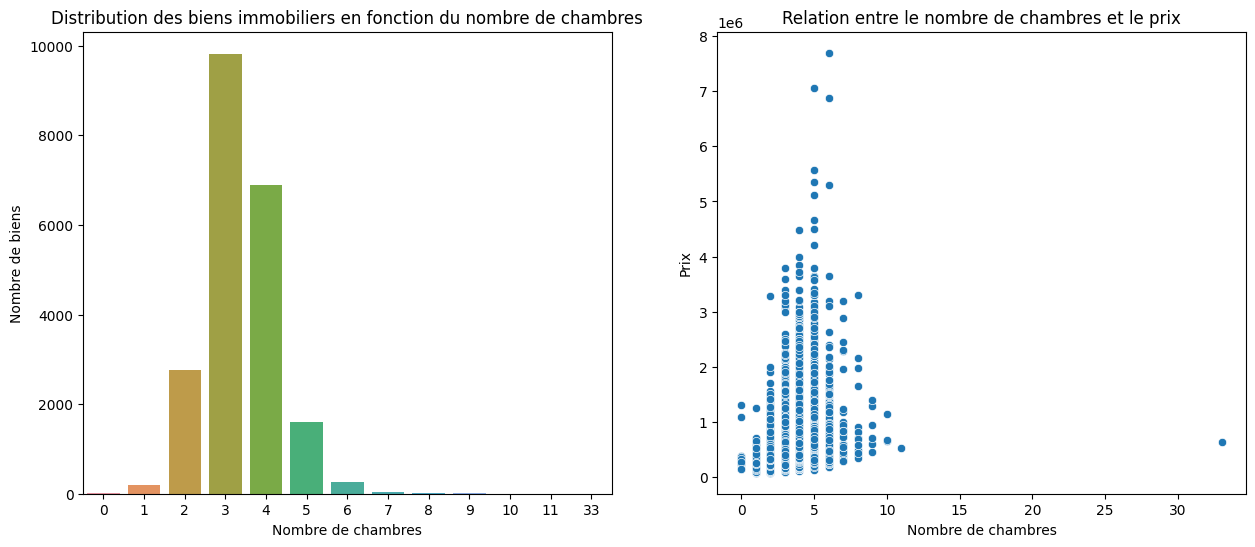

In [27]:
f, (ax1,ax2) = plt.subplots(1,2)
f.set_size_inches(15,6)
sns.countplot(data=df,x='bedrooms', ax=ax1)
ax1.set_xlabel('Nombre de chambres')
ax1.set_ylabel('Nombre de biens')
ax1.set_title('Distribution des biens immobiliers en fonction du nombre de chambres')

sns.scatterplot(data=df, x='bedrooms', y='price', ax=ax2)
ax2.set_xlabel('Nombre de chambres')
ax2.set_ylabel('Prix')
ax2.set_title('Relation entre le nombre de chambres et le prix')



On remarque ici une valeur extrême. De la même manière que pour les prix, on peut choisir de la laisser ou de la retirer pour tester nos modèles. On va la retirer de notre dataframe df_filtre.

In [28]:
df_filtre = df_filtre[df_filtre['bedrooms']<30]

Text(0.5, 1.0, 'Relation entre le nombre de chambres et le prix')

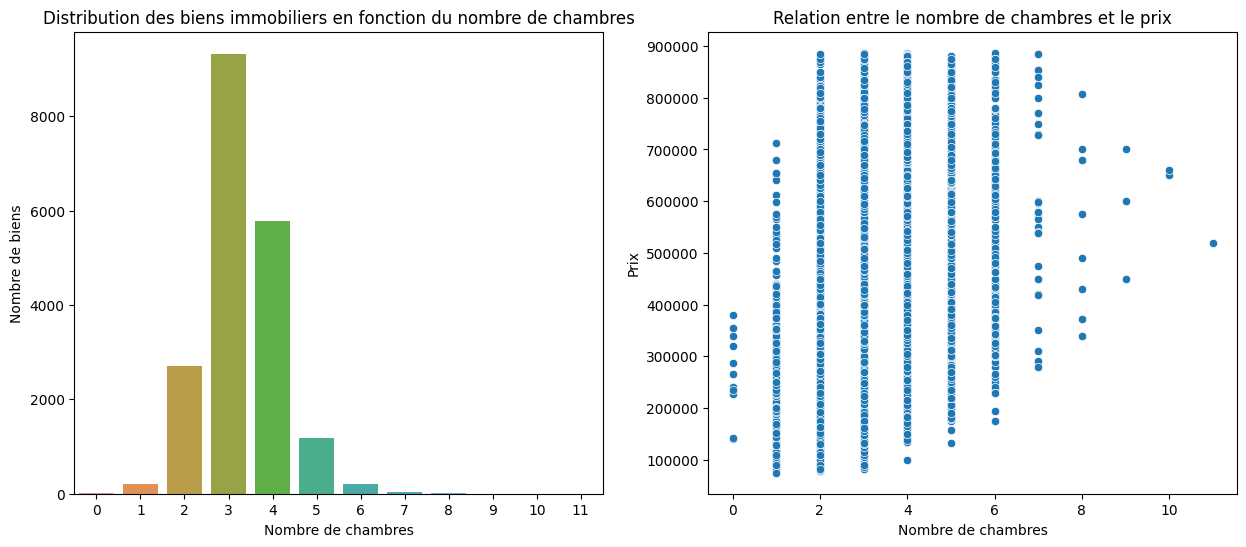

In [29]:
f, (ax1,ax2) = plt.subplots(1,2)
f.set_size_inches(15,6)
sns.countplot(data=df_filtre,x='bedrooms', ax=ax1)
ax1.set_xlabel('Nombre de chambres')
ax1.set_ylabel('Nombre de biens')
ax1.set_title('Distribution des biens immobiliers en fonction du nombre de chambres')

sns.scatterplot(data=df_filtre, x='bedrooms', y='price', ax=ax2)
ax2.set_xlabel('Nombre de chambres')
ax2.set_ylabel('Prix')
ax2.set_title('Relation entre le nombre de chambres et le prix')

### Nombre de salles de bain

In [30]:
corr_bathrooms = df.corrwith(df['price']).bathrooms
corr_bathrooms

/tmp/ipykernel_40084/3319187241.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_bathrooms = df.corrwith(df['price']).bathrooms


0.5251433412598578

Il existe une corrélation positive représentative de 0.53 entre le prix d'un bien et le nombre de chambre. 

Text(0.5, 1.0, 'Relation entre le nombre de salles de bain et le prix')

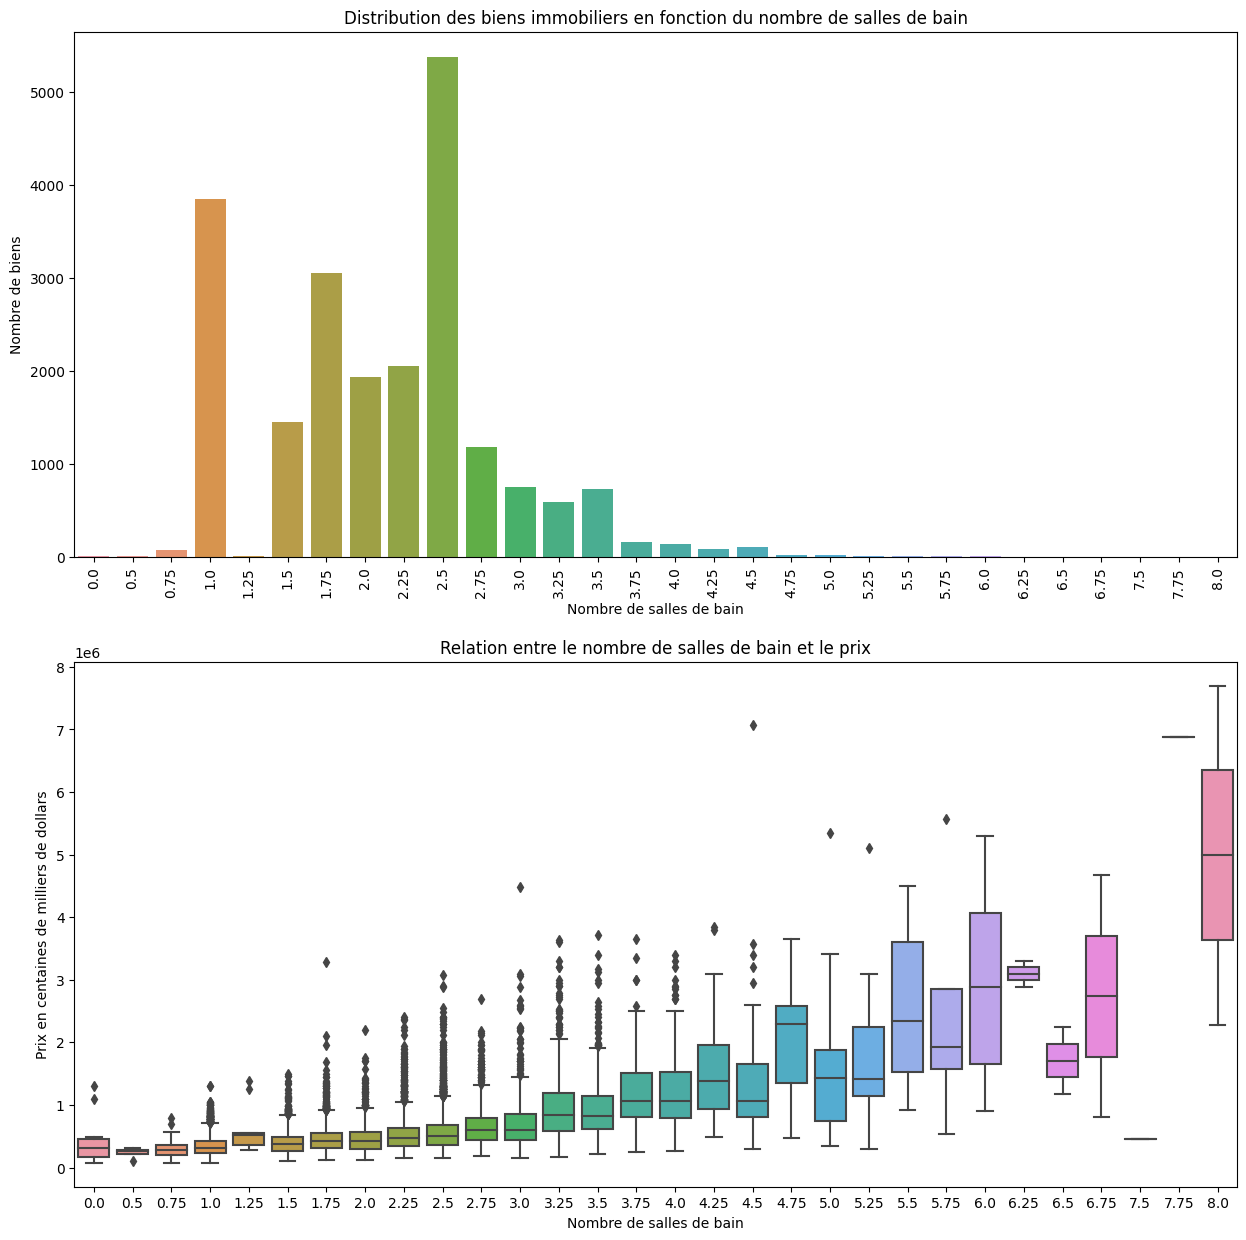

In [31]:
f, (ax1,ax2) = plt.subplots(2,1)
f.set_size_inches(15,15)
sns.countplot(data=df,x='bathrooms', ax=ax1)
ax1.set_xlabel('Nombre de salles de bain')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_ylabel('Nombre de biens')
ax1.set_title('Distribution des biens immobiliers en fonction du nombre de salles de bain')

sns.boxplot(data=df, x='bathrooms', y='price', ax=ax2)
ax2.set_xlabel('Nombre de salles de bain')
ax2.set_ylabel('Prix en centaines de milliers de dollars')
ax2.set_title('Relation entre le nombre de salles de bain et le prix')



In [32]:
df_filtre = df_filtre[df_filtre['bathrooms']<df_filtre['bathrooms'].quantile(0.95)]

Text(0.5, 1.0, 'Relation entre le nombre de salles de bain et le prix sans valeurs extrêmes')

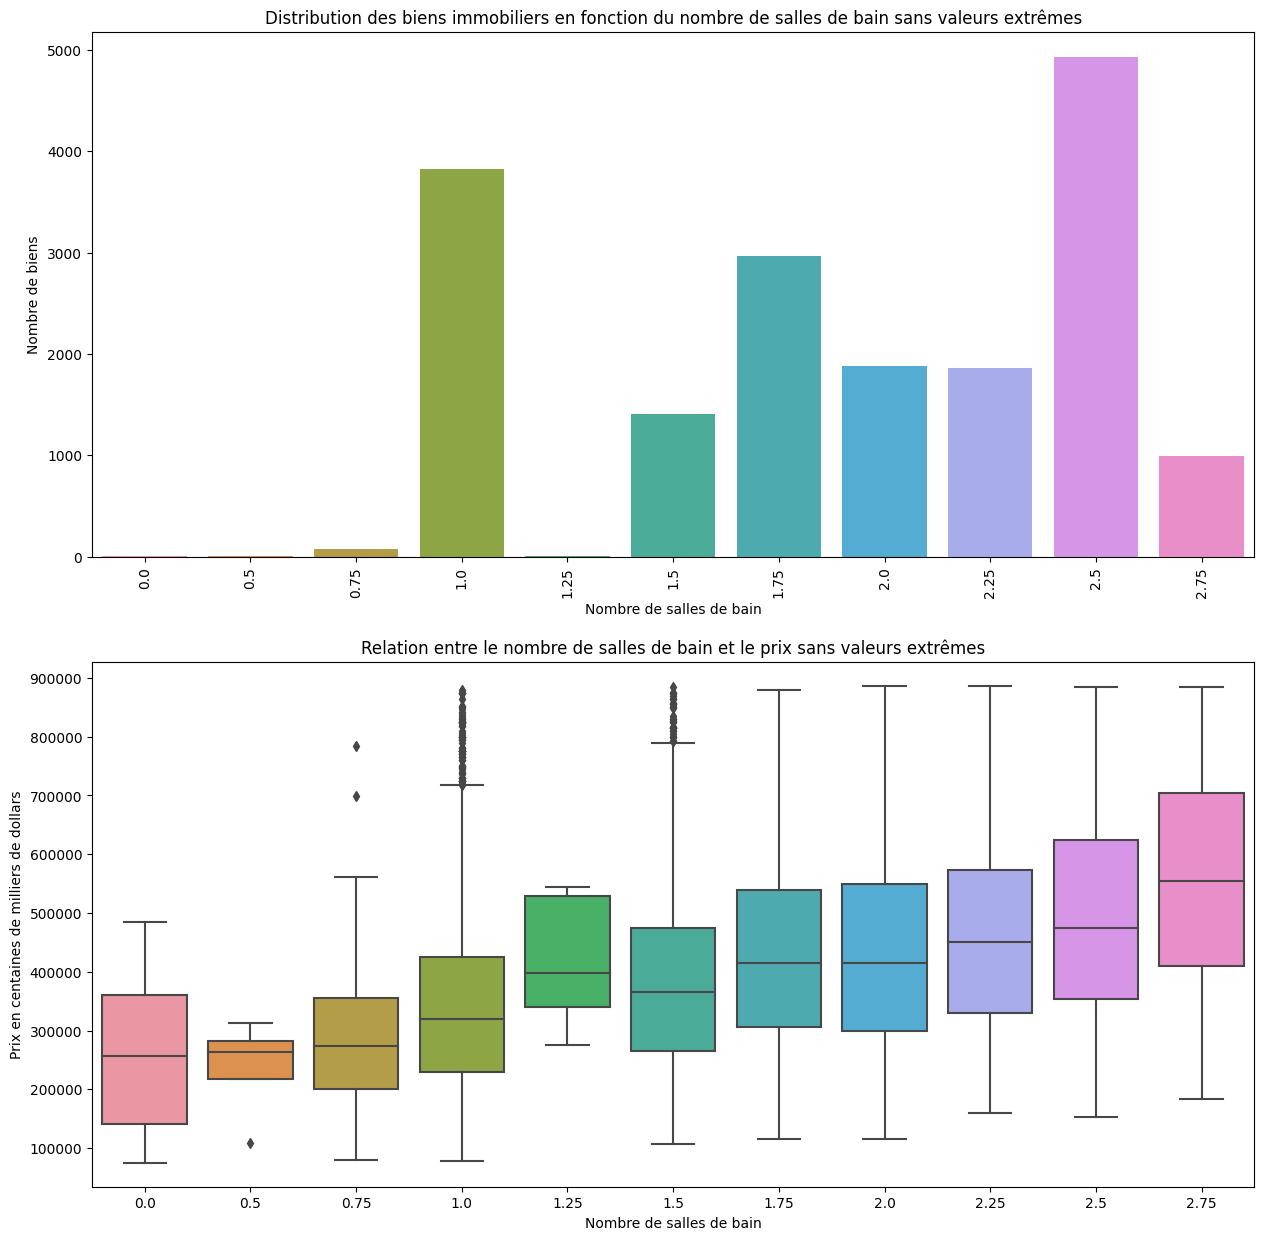

In [33]:
f, (ax1,ax2) = plt.subplots(2,1)
f.set_size_inches(15,15)
sns.countplot(data=df_filtre,x='bathrooms', ax=ax1)
ax1.set_xlabel('Nombre de salles de bain')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_ylabel('Nombre de biens')
ax1.set_title('Distribution des biens immobiliers en fonction du nombre de salles de bain sans valeurs extrêmes')

sns.boxplot(data=df_filtre, x='bathrooms', y='price', ax=ax2)
ax2.set_xlabel('Nombre de salles de bain')
ax2.set_ylabel('Prix en centaines de milliers de dollars')
ax2.set_title('Relation entre le nombre de salles de bain et le prix sans valeurs extrêmes')

### Surface


In [34]:
corr_surface = df.corrwith(df['price']).m2_living
corr_surface

/tmp/ipykernel_40084/4283094995.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_surface = df.corrwith(df['price']).m2_living


0.7020372036060016

La surface a une corrélation positive est significative de 0,7 avec le prix du bien.

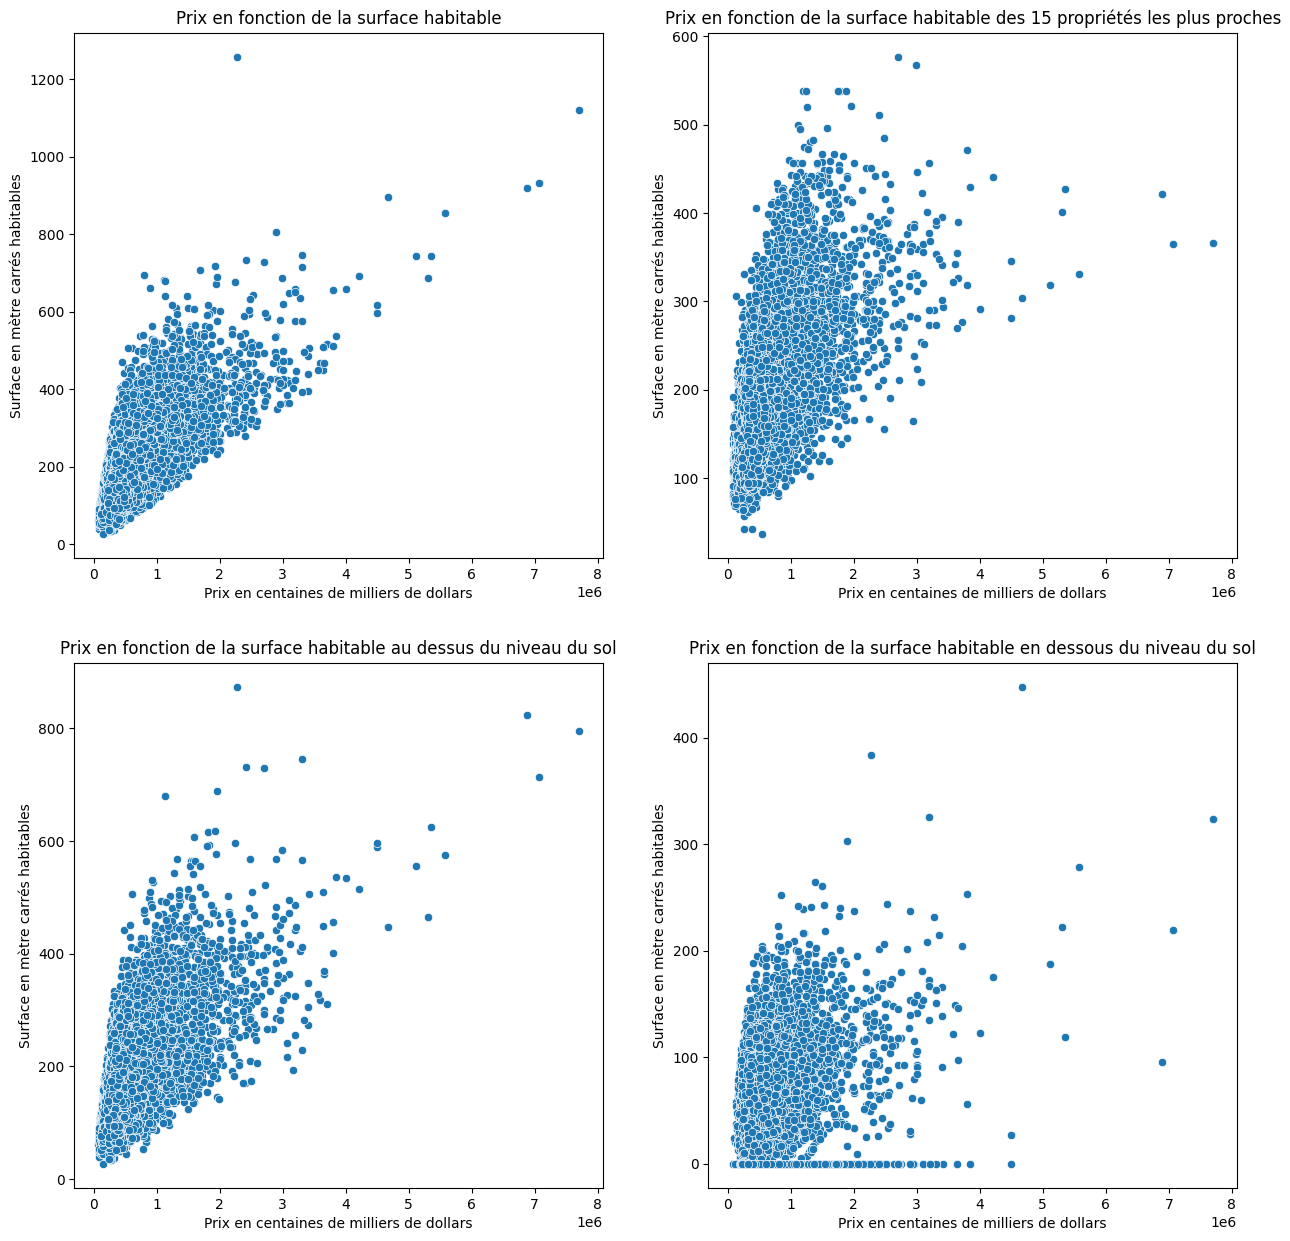

In [35]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

sns.scatterplot(data=df, x='price',y='m2_living', ax=ax1)
ax1.set_title('Prix en fonction de la surface habitable')
ax1.set_xlabel('Prix en centaines de milliers de dollars')
ax1.set_ylabel('Surface en mètre carrés habitables')

sns.scatterplot(data=df, x='price',y='m2_living15', ax=ax2)
ax2.set_title('Prix en fonction de la surface habitable des 15 propriétés les plus proches')
ax2.set_xlabel('Prix en centaines de milliers de dollars')
ax2.set_ylabel('Surface en mètre carrés habitables')

sns.scatterplot(data=df, x='price',y='m2_above', ax=ax3)
ax3.set_title('Prix en fonction de la surface habitable au dessus du niveau du sol')
ax3.set_xlabel('Prix en centaines de milliers de dollars')
ax3.set_ylabel('Surface en mètre carrés habitables')

sns.scatterplot(data=df, x='price',y='m2_basement', ax=ax4)
ax4.set_title('Prix en fonction de la surface habitable en dessous du niveau du sol')
ax4.set_xlabel('Prix en centaines de milliers de dollars')
ax4.set_ylabel('Surface en mètre carrés habitables')

plt.show()



### Grade

In [36]:
corr_grade = df.corrwith(df['price']).grade
corr_grade

/tmp/ipykernel_40084/2194821130.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_grade = df.corrwith(df['price']).grade


0.6674499371940918

Il y a une corrélation positive et significative de 0.67 entre le grade de la maison et son prix.

Text(0.5, 1.0, 'Prix en fonction du grade')

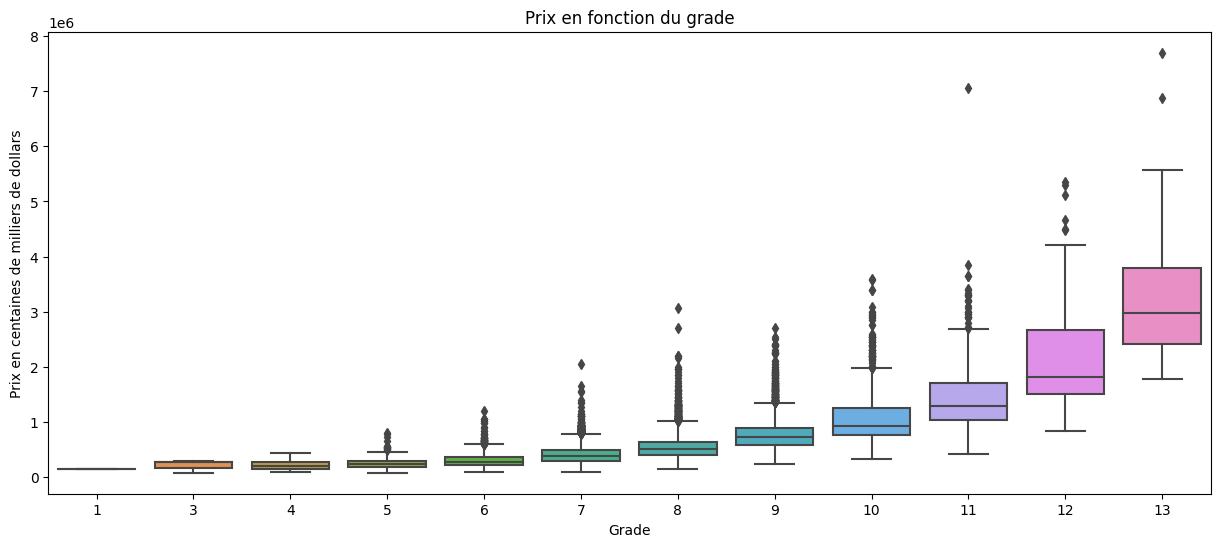

In [37]:
f, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data=df, x='grade', y='price')
plt.xlabel('Grade')
plt.ylabel('Prix en centaines de milliers de dollars')
plt.title('Prix en fonction du grade')


### Vue

In [38]:
corr_view = df.corrwith(df['price'])['view']
corr_view

/tmp/ipykernel_40084/868432116.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_view = df.corrwith(df['price'])['view']


0.39741294380281456

Il y a une corrélation positive et significative de 0.40 entre la qualité de la vue et le prix de la maison.

Text(0.5, 1.0, 'Prix en fonction de la vue')

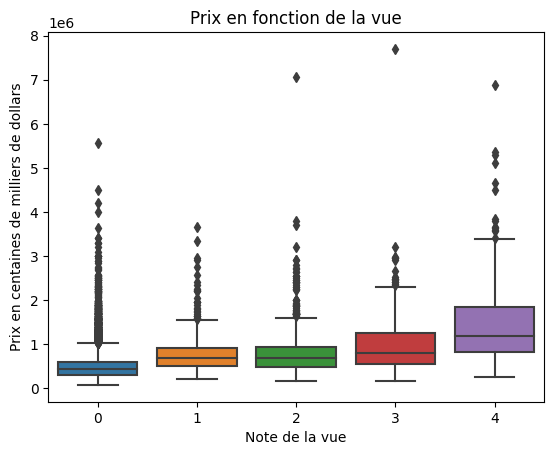

In [39]:
sns.boxplot(data=df, x = 'view', y='price')
plt.xlabel('Note de la vue')
plt.ylabel('Prix en centaines de milliers de dollars')
plt.title('Prix en fonction de la vue')

### Vue sur mer

In [40]:
corr_waterfront = df.corrwith(df['price'])['waterfront']
corr_waterfront

/tmp/ipykernel_40084/3046702287.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_waterfront = df.corrwith(df['price'])['waterfront']


0.2663704476821352

Il y a une corrélation positive et significative de 0.27 entre la qualité de la vue et le prix de la maison.

Text(0.5, 1.0, 'Prix en fonction de la vue sur mer')

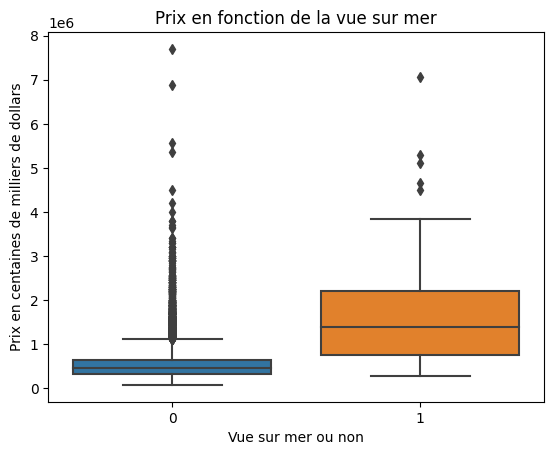

In [41]:
sns.boxplot(data=df, x = 'waterfront', y='price')
plt.xlabel('Vue sur mer ou non')
plt.ylabel('Prix en centaines de milliers de dollars')
plt.title('Prix en fonction de la vue sur mer')

In [42]:
# Sauvegarder les dataframe qui nous serviront pour les modèles 

df.to_csv('data_cleaned.csv')
df_filtre.to_csv('data_cleaned2.csv')

In [43]:
df['zipcode'].astype(int).unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])